In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("/kaggle/input/eeg-brainwave-dataset-feeling-emotions/emotions.csv")
data.head()
# for col in data.columns:
#     print(col)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [2]:
# Gather FFT data features
fft_data = data.filter(regex = '^fft_')
print(fft_data)

      fft_0_a  fft_1_a  fft_2_a  fft_3_a  fft_4_a  fft_5_a  fft_6_a  fft_7_a  \
0      -520.0   398.00  -201.00  -201.00   398.00    -52.2   121.00   -64.00   
1        66.2    -4.30    43.60    43.60    -4.30     66.0   -29.00    73.30   
2       -90.8   204.00   -77.10   -77.10   204.00   -488.0   415.00  -187.00   
3       119.0     6.25    10.90    10.90     6.25   -333.0   283.00  -144.00   
4        59.0    -2.37    10.80    10.80    -2.37    118.0    -1.81    26.70   
...       ...      ...      ...      ...      ...      ...      ...      ...   
2127    171.0    12.00   -16.10   -16.10    12.00    185.0    -2.14   -21.60   
2128   -127.0   261.00  -106.00  -106.00   261.00   -530.0   445.00  -196.00   
2129   -440.0   302.00  -156.00  -156.00   302.00   -248.0   276.00  -117.00   
2130    153.0    25.60     6.89     6.89    25.60   -257.0   317.00  -159.00   
2131    122.0    -8.15    46.30    46.30    -8.15    177.0    11.70    -5.67   

      fft_8_a  fft_9_a  ...  fft_740_b 

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['label']=le.fit_transform(data['label'])

y = data.pop('label')

In [4]:
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=48)
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

# create data split for just fft data
x_fft = fft_data
x_train_fft, x_test_fft, y_train_fft, y_test_fft = train_test_split(x_fft, y, train_size=0.7, random_state=48)
x_train_fft = np.array(x_train_fft).reshape((x_train_fft.shape[0],x_train_fft.shape[1],1))
y_train_fft = pd.get_dummies(y_train_fft)
y_test_fft = pd.get_dummies(y_test_fft)

(1492, 2548, 1)


In [5]:
from keras.layers import Flatten, Dense, BatchNormalization, Dropout
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU

In [6]:
def build_train_rnn(x_train, y_train, x_test, y_test, layer='gru', units=128, epochs=10, optimizer='adam', 
                    loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'], add_FC=False):
    
    inputs = tf.keras.Input(shape=(x_train.shape[1],1))
    if layer == 'gru':
        rnn = GRU(units, return_sequences=True)(inputs)
    elif layer == 'lstm':
        rnn = LSTM(units)(inputs)
    elif layer == 'simple_rnn':
        rnn = SimpleRNN(units)(inputs)
        
    flat = Flatten()(rnn)
    if add_FC:
        fc = Dense(10, activation='relu')(flat)
        outputs = Dense(3, activation='softmax')(fc)
    else:
        outputs = Dense(3, activation='softmax')(flat)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    
    # compile the model using categorical cross entropy loss function
    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=metrics
    )

    # train the model for 10 epochs
    history = model.fit(
        x_train, 
        y_train, 
        epochs=epochs, 
        validation_data=(x_test, y_test)
    )

    # evaluate the model on the test data
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # plot the loss curve for training
    plt.figure(figsize=[6,4])
    plt.plot(history.history['loss'], 'black', linewidth=3.0)
    plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
    plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
    plt.xlabel('Epochs', fontsize=10)
    plt.ylabel('Loss', fontsize=10)
    plt.title('Loss Curves', fontsize=12)

In [7]:
# inputs = tf.keras.Input(shape=(X_train.shape[1],1))
# # gru = tf.keras.layers.GRU(512, return_sequences=True)(inputs)
# rnn_simple = SimpleRNN(128)(inputs)
# flat = Flatten()(rnn_simple)
# outputs = Dense(3, activation='softmax')(flat)
# model = tf.keras.Model(inputs, outputs)
# model.summary()

In [8]:
# # compile the model using categorical cross entropy loss function
# model.compile(
#     optimizer='adam', 
#     loss=tf.keras.losses.CategoricalCrossentropy(), 
#     metrics=['accuracy']
# )

# # train the model for 10 epochs
# history = model.fit(
#     X_train, 
#     y_train, 
#     epochs=50, 
#     batch_size=32,
#     validation_data=(X_test, y_test)
# )

# # evaluate the model on the test data
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# # plot the loss curve for training
# plt.figure(figsize=[6,4])
# plt.plot(history.history['loss'], 'black', linewidth=3.0)
# plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
# plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plt.xlabel('Epochs', fontsize=10)
# plt.ylabel('Loss', fontsize=10)
# plt.title('Loss Curves', fontsize=12)


In [9]:
# print(y_train_fft.shape)
# print(y_test_fft.shape)

In [10]:
# # detect and init the TPU
# # tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# # instantiate a distribution strategy
# # tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# # set TPU batch size
# # BATCH_SIZE = 32 * tpu_strategy.num_replicas_in_sync

# # instantiating the model in the strategy scope creates the model on the TPU
# # with tpu_strategy.scope():
# inputs_sparse = tf.keras.Input(shape=(x_train_fft.shape[1],1))
# rnn_simple_sparse_1 = SimpleRNN(128)(inputs_sparse)
# # print(rnn_simple_sparse_1.shape)
# # reshape = tf.keras.layers.Reshape((128, 1))(rnn_simple_sparse_1)
# # print(reshape.shape)
# # rnn_simple_sparse_2 = SimpleRNN(128)(reshape)
# # flat_sparse = Flatten()(rnn_simple_sparse_2)
# flat_sparse = Flatten()(rnn_simple_sparse_1)
# outputs_sparse = Dense(3, activation='softmax')(flat_sparse)
# model_sparse = tf.keras.Model(inputs_sparse, outputs_sparse)
# model_sparse.summary()

# # compile the model using categorical cross entropy loss function
# model_sparse.compile(
#     optimizer='adam', 
#     loss=tf.keras.losses.CategoricalCrossentropy(), 
#     metrics=['accuracy']
# )

# # train the model for 50 epochs
# history_sparse = model_sparse.fit(
#     x_train_fft, 
#     y_train_fft, 
#     epochs=50, 
#     validation_data=(x_test_fft, y_test_fft)
# )

# # evaluate the model on the test data
# score_sparse = model_sparse.evaluate(x_test_fft, y_test_fft, verbose=0)
# print('Test loss:', score_sparse[0])
# print('Test accuracy:', score_sparse[1])

# # plot the loss curve for training
# plt.figure(figsize=[6,4])
# plt.plot(history_sparse.history['loss'], 'black', linewidth=3.0)
# plt.plot(history_sparse.history['val_loss'], 'blue', linewidth=3.0)
# plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plt.xlabel('Epochs', fontsize=10)
# plt.ylabel('Loss', fontsize=10)
# plt.title('Loss Curves', fontsize=12)

In [11]:
# inputs_gru = tf.keras.Input(shape=(X_train.shape[1],1))
# gru = GRU(128, return_sequences=True)(inputs_gru)
# flat_gru = Flatten()(gru)
# outputs_gru = Dense(3, activation='softmax')(flat_gru)
# model_gru = tf.keras.Model(inputs_gru, outputs_gru)
# model_gru.summary()

In [12]:
# # compile the model using categorical cross entropy loss function
# model_gru.compile(
#     optimizer='adam', 
#     loss=tf.keras.losses.CategoricalCrossentropy(), 
#     metrics=['accuracy']
# )

# # train the model for 10 epochs
# history_gru = model_gru.fit(
#     X_train, 
#     y_train, 
#     epochs=10, 
#     validation_data=(X_test, y_test)
# )

# # evaluate the model on the test data
# score_gru = model_gru.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score_gru[0])
# print('Test accuracy:', score_gru[1])

# # plot the loss curve for training
# plt.figure(figsize=[6,4])
# plt.plot(history_gru.history['loss'], 'black', linewidth=3.0)
# plt.plot(history_gru.history['val_loss'], 'blue', linewidth=3.0)
# plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plt.xlabel('Epochs', fontsize=10)
# plt.ylabel('Loss', fontsize=10)
# plt.title('Loss Curves', fontsize=12)

In [13]:
# build_train_rnn(x_train_fft, y_train_fft, x_test_fft, y_test_fft, 'gru', 128, 10)

In [14]:
# build_train_rnn(X_train, y_train, X_test, y_test, 'gru', 256, 10)

In [15]:
# build_train_rnn(X_train, y_train, X_test, y_test, 'lstm', 128, 10)

# Attempted Modifications for Better Performance
* Use sparse categorical cross entropy
    * Didn't compile due to labels being one-hot, not integers.
* Change number of units in SimpleRNN layer
    * 256 units -> worse accuracy
    * 64 units -> worse accuracy
* More Simple RNN layers
    * 2 RNN layers -> worse accuracy (~85%)
* Only use FFT data columns
    * worse accuracy (~87.5%)
    
# Things to try going forward
* Data augmentation for more training data

In [16]:
# build_train_rnn(X_train, y_train, X_test, y_test, 'gru', 128, 10, add_FC=True)

# Improvements for this model

It looks like this model has high variance (0.0007% train error, 2.5% test/dev error). At this point I modified the dense layer to use L2 regularization in an attempt to help with this.

In [17]:
# build_train_rnn(X_train, y_train, X_test, y_test, 'gru', 128, 10, add_FC=True)

# Notes
Adding L2 regularization seemed to kill both train and dev/test accuracy, reducing both down to ~33%. Going to try adding dropout next as a different attempt at reducing variance.

In [18]:
# build_train_rnn(X_train, y_train, X_test, y_test, 'gru', 128, 10, add_FC=True)

# Notes
Dropout also decreased performance quite a bit

# Compare results from model with and without an added FC layer

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru (GRU)                   (None, 2548, 128)         50304     
                                                                 
 flatten (Flatten)           (None, 326144)            0         
                                                                 
 dense (Dense)               (None, 10)                3261450   
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 3,311,787
Trainable params: 3,311,787
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
47/47 [==============================] -

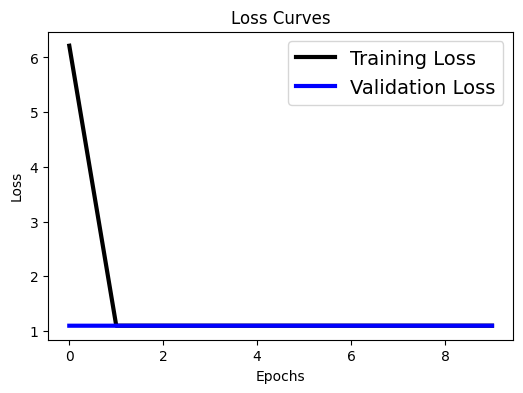

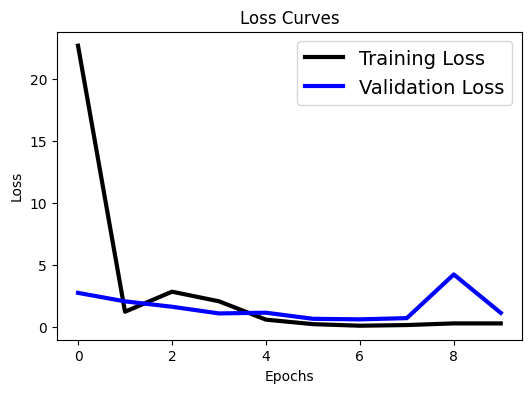

In [19]:
build_train_rnn(X_train, y_train, X_test, y_test, 'gru', 128, 10, add_FC=True)
build_train_rnn(X_train, y_train, X_test, y_test, 'gru', 128, 10, add_FC=False)